In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import boto3
import json
import sys
import pandas as pd
from io import StringIO

sys.path.append('c:/users/home/desktop/BTXGH/instagramEDA')
from feature import *

bucketName = 'instagram-post'
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketName)

csv = pd.read_csv('c:/users/home/desktop/instagram-crawler_/instagram.csv', header=None, names=['username'])

obj = s3.Object('instagram-profile', 'profile_influencer.csv')
influencer_profile = pd.read_csv(obj.get()['Body'], index_col=0)

result = pd.DataFrame()

i = 0 

for json_file in my_bucket.objects.all():
    i+=1
    if json_file.key[-4:]=='json':
        content_object = s3.Object(bucketName, json_file.key)
        file_content = content_object.get()['Body'].read().decode('utf-8')
        data = json.loads(file_content)

        username = csv.loc[json_file.key[:-5]][0]

        influencer = {'name': username,
            'youtube': json_file.key[:-5],
            'avg_hashtag': avg_hashtags(data),   
            'avg_comment': avg_comments(data),
            'avg_self_comment': avg_self_comments(data, username),
            'post_interval': post_interval(data),
            'ppl_img_ratio': ppl_img_ratio(data),
            'comment_user_num': str(user_comment(data)),
            'lang_ratio': str(lang_detection(data))}   

        result = pd.concat([result, pd.DataFrame(influencer)])

In [20]:
total = pd.merge(result, influencer_profile, left_on='name', right_on='username')
total.head()

,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,alias,username,bio,num_of_posts,followers,following,bio_url,isprivate,scraped
0,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,0__0man,광고문의는 DM📩,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47
1,seonozzi,JungSeonho,0.3,39.8,0.0,0.172414,0.15,"{'comment1': 225, 'comment2': 34, 'comment3': ...","{'ko': '87.44', 'emoji': '12.56'}",정 선호,seonozzi,창작자,81,57988,139,www.youtube.com/Seonozzi,False,2019-07-13 07:11:39
2,hyesunee,Mr19940711,0.9,30.7,0.0,0.588235,0.71,"{'comment1': 133, 'comment2': 28, 'comment3': ...","{'ko': '83.39', 'emoji': '16.61'}",혜서니,hyesunee,CJ E&M DIAtv 혜서니:) <부계정 x>\r\r\r\n🌻 혜바라기집합소🌻,342,147460,120,goo.gl/Xk68oD,False,2019-07-13 07:11:07
3,hun1188,UC-6FxcmnbyVeZaYc025I_xQ,1.4,1.3,0.5,0.128205,0.67,"{'comment1': 4, 'comment2': 2, 'comment3': 0, ...","{'ko': '84.62', 'emoji': '15.38'}",이지훈,hun1188,Microsoft Powerpoint MVP\r\r\r\n유튜브 '이지쌤' 채널 운...,343,919,363,goo.gl/2APxn7,False,2019-07-13 07:15:06
4,hansangki0755,UC-IBt8pM8hWx8wiwjcDLdIQ,3.5,19.7,6.0,0.526316,0.07,"{'comment1': 78, 'comment2': 23, 'comment3': 3...",{'ko': '100.00'},한상기 Han Sang Ki,hansangki0755,NaN,591,6397,353,www.autopress.co.kr,False,2019-07-13 07:14:21


In [22]:
import boto3
import json
import sys
import pandas as pd
from io import StringIO

sys.path.append('c:/users/home/desktop/BTXGH/instagramEDA')
from feature import *

bucketName = 'instagram-post'
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketName)

csv = pd.read_csv('c:/users/home/desktop/instagram-crawler_/instagram.csv', header=None, names=['username'])

obj = s3.Object('instagram-profile', 'profile_influencer.csv')
influencer_profile = pd.read_csv(obj.get()['Body'], index_col=0)

result = pd.DataFrame()

i = 0 

for json_file in my_bucket.objects.all():
    i+=1
    if json_file.key[-4:]=='json':
        content_object = s3.Object(bucketName, json_file.key)
        file_content = content_object.get()['Body'].read().decode('utf-8')
        data = json.loads(file_content)
        
        username = csv.loc[json_file.key[:-5]][0]

        caption = []
        comments = []
        hashtags = []
        likes = []
        for post in data:
            if post.get('caption'):
                caption.append(post.get('caption'))
            else:
                caption.append('')
            if post.get('comments'):
                comments.append(post.get('comments')) 
            else:
                comments.append('')
            if post.get('hashtags'):
                hashtags.append(post.get('hashtags')) 
            else:
                hashtags.append('')
            if post.get('likes'):
                likes.append(post.get('likes')) 
            else:
                likes.append('0')
            post_info = {'name': username, 'caption': caption, 'comments': comments, 'hashtags': hashtags, 'likes': likes}

            result = pd.concat([result, pd.DataFrame(post_info)])

In [2]:
### 팔로워 EDA
import boto3
import json
import sys
import pandas as pd
from io import StringIO

bucketName = 'instagram-profile'
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketName)

total = pd.DataFrame()
for json_file in my_bucket.objects.all():
    obj = s3.Object(bucketName, json_file.key)
    data = pd.read_csv(obj.get()['Body'], index_col=0, header=None, names=['index', 'alias', 'bio', 'bio_url', 'followers', 'following', 'isprivate', 'num_of_posts', 'scraped', 'username'])
    data['influencer'] = json_file.key
    total = pd.concat([total, data])
    
total.to_csv('c:/users/home/desktop/followers_total.csv')
        
#followers[['followers', 'following', 'num_of_posts']] = followers[['followers', 'following', 'num_of_posts']].astype(int)

# EDA용 dataframe: post를 한 row로

In [23]:
df = pd.merge(total, result, on='name')
df = df.loc[df.astype(str).drop_duplicates().index]
df.head()

,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,alias,...,num_of_posts,followers,following,bio_url,isprivate,scraped,caption,comments,hashtags,likes
0,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,,,,17863
2,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,,,,3007
5,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,💕,"[{'author': 'kariacostav', 'comment': '😍😍'}, {...",,3381
9,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,안경끼니까 뽀로로같네,"[{'author': 'ping_siewsook', 'comment': '😚❤️❤️...",,14918
14,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,내가 가장 좋아하는 바닷가 :속초,"[{'author': 'perrenelle', 'comment': '😍😍😍'}, {...",,9342


In [25]:
df.columns

Index(['name', 'youtube', 'avg_hashtag', 'avg_comment', 'avg_self_comment',
       'post_interval', 'ppl_img_ratio', 'comment_user_num', 'lang_ratio',
       'alias', 'username', 'bio', 'num_of_posts', 'followers', 'following',
       'bio_url', 'isprivate', 'scraped', 'caption', 'comments', 'hashtags',
       'likes'],
      dtype='object')

In [27]:
df.shape[0]/10

220.5

In [28]:
df[['avg_hashtag', 'avg_comment', 'avg_self_comment','post_interval', 'ppl_img_ratio']]=df[['avg_hashtag', 'avg_comment', 'avg_self_comment','post_interval', 'ppl_img_ratio']].astype(float)
df[['num_of_posts', 'followers', 'following','likes']]=df[['num_of_posts', 'followers', 'following','likes']].astype(int)

In [24]:
df.to_csv('c:/users/home/desktop/total_data.csv', index=None)

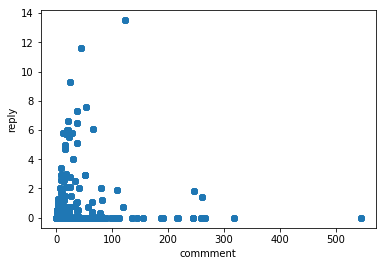

In [94]:
plot_compare(df['avg_comment'], df['avg_self_comment'], 'commment', 'reply')

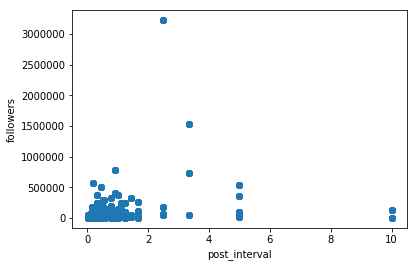

In [233]:
plot_compare(df['post_interval'], df['followers'], 'post_interval', 'followers')

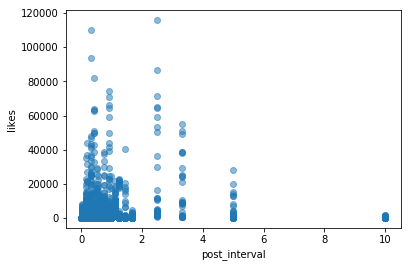

In [234]:
plot_compare(df['post_interval'], df['likes'], 'post_interval', 'likes')

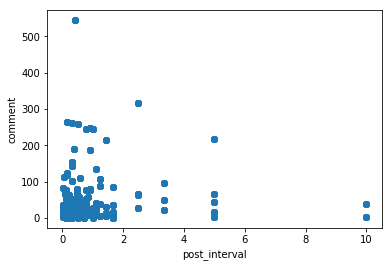

In [95]:
plot_compare(df['post_interval'], df['avg_comment'], 'post_interval', 'comment')

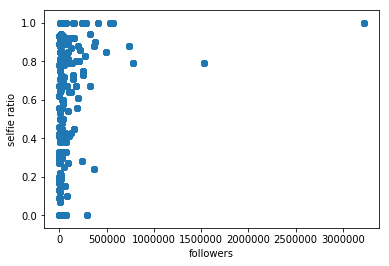

In [236]:
plot_compare(df['followers'], df['ppl_img_ratio'], 'followers', 'selfie ratio')

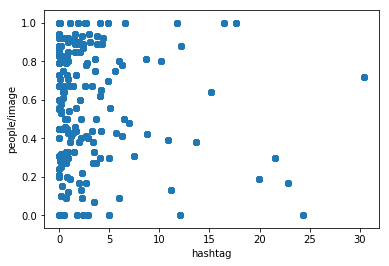

In [96]:
plot_compare(df['avg_hashtag'], df['ppl_img_ratio'], 'hashtag', 'people/image')

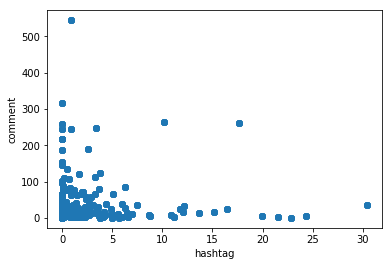

In [97]:
plot_compare(df['avg_hashtag'], df['avg_comment'], 'hashtag', 'comment')

In [106]:
df['likes'].astype(int).mean()

4351.004772004242

35


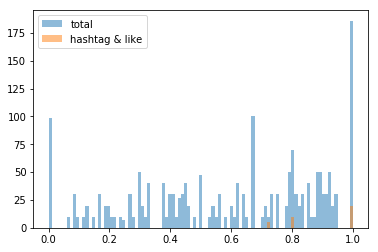

In [122]:
post = df[(df.avg_hashtag > 10) & (df.likes > 5000)]
print(post.shape[0])

bins = np.linspace(0, 1, 100)

plt.hist(df['ppl_img_ratio'], bins, alpha=0.5, label='total')
plt.hist(post['ppl_img_ratio'], bins, alpha=0.5, label='hashtag & like')
plt.legend(loc='upper left')
plt.show()

In [155]:
df['num_of_hashtags'].mean()

2.940983606557377

21

아리키친(ARIKITCHEN)    5
Ko Hyojoo           4
Serim Hong          3
Bella&Lucas         2
순이                  2
Euddeum shim        2
남순(박현우)             1
혜서니                 1
정 선호                1
Name: alias, dtype: int64

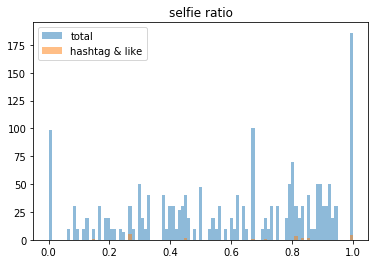

In [162]:
post = df[(df.num_of_hashtags > 5) & (df.likes > 1000)]
display(post.shape[0], post['alias'].value_counts())

bins = np.linspace(0, 1, 100)

plt.hist(df['ppl_img_ratio'], bins, alpha=0.5, label='total')
plt.hist(post['ppl_img_ratio'], bins, alpha=0.5, label='hashtag & like')
plt.legend(loc='upper left')
plt.title('selfie ratio')
plt.show()

# New Features

- num_of_hashtags
- reply_ratio
- like/follower

In [153]:
hashtags = df['hashtags'].tolist()
num_of_hashtags = []
for tag in hashtags:
    if tag != '0':
        num_of_hashtags.append(len(tag))
    else:
        num_of_hashtags.append(0)
df['num_of_hashtags'] = pd.DataFrame(num_of_hashtags).astype(int)
        
#df['hashtags'][112]

In [177]:
df['reply_ratio'] = df['avg_self_comment']/df['avg_comment']*100

In [199]:
df.drop_duplicates('username').sort_values('reply_ratio', ascending=False)[['alias', 'reply_ratio', 'followers']][:10]

,alias,reply_ratio,followers
9241,JAELIM 💘,45.833333,11844
6160,김수진 (셀프어쿠스틱),44.615385,6608
8691,Hye Young Rhee,42.857143,2407
2585,슬림앤파워 대표 리쌤 (바벨라토르),39.534884,18896
165,이지훈,38.461538,919
8856,홍시대장,38.114754,455
7838,도엽,37.142857,756
10561,조영근,34.523810,53108
7453,민호타우르스,33.333333,899
9901,Danse Jin (춤추는선진이),33.333333,15812


Slope: -0.002
Intercept: 1.181


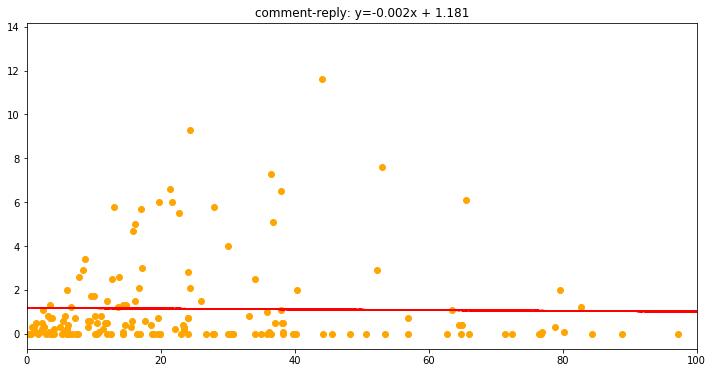

In [29]:
ax = df['avg_comment']
ay = df['avg_self_comment']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(0, 100)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('comment-reply: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: -1.210
Intercept: 48.874


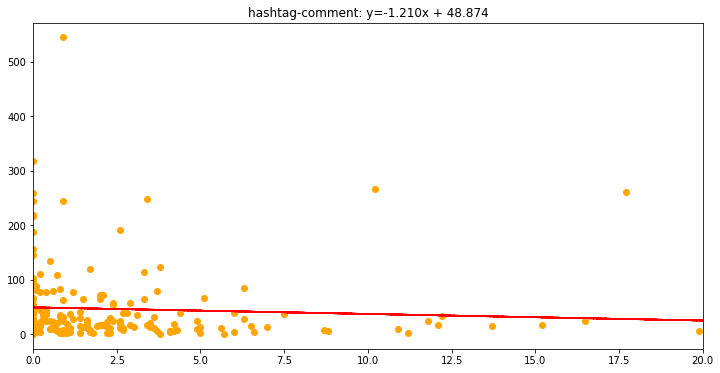

In [31]:
ax = df['avg_hashtag']
ay = df['avg_comment']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(0, 20)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('hashtag-comment: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: 0.025
Intercept: 1783.417


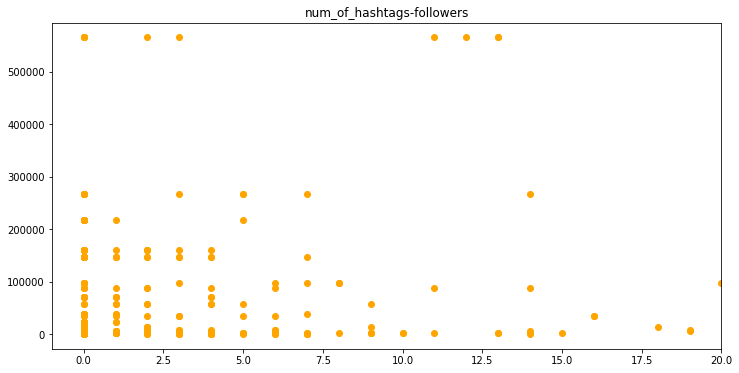

In [211]:
ax = df['num_of_hashtags']
ay = df['followers']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-1, 20)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('num_of_hashtags-followers')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: nan
Intercept: nan


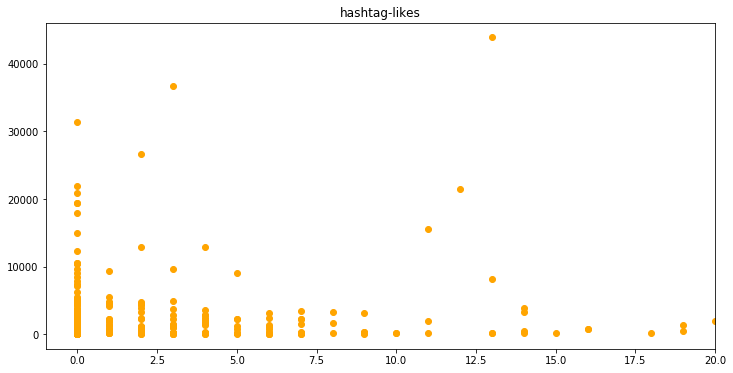

In [188]:
ax = df['num_of_hashtags']
ay = df['likes']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-1, 20)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('num_of_hashtags-likes')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

In [232]:
df[(df.num_of_hashtags > 10)][['followers', 'alias', 'caption', 'likes', 'username', 'hashtags']]

,followers,alias,caption,likes,username,hashtags
222,6397,한상기 Han Sang Ki,현대 베뉴 스마트스트림 G1.6.\n사진보다 예쁘고 차는 작네요\n시승기는 새벽까지...,520,hansangki0755,"[현대베뉴, 한상기, 집에서멀어요]"
264,6397,한상기 Han Sang Ki,"포르쉐 911 GT3.\n간만에 느껴보는 9,000 rpm의 맛.\n그동안 자연흡기...",400,hansangki0755,"[그래서난카이엔, 터보가짱, 991GT3, 포르쉐월드로드쇼, 한상기]"
295,8126,Bella&Lucas,드디어 내일!!! 저희 앨범이 발매됩니다!!!!!!❤️🧡💛내일 8시에 저희 앨범 타...,1316,bellawithlucas,"[newalbum, 앨범발매, bellu, 벨루]"
440,88279,Serim Hong,오... 홍지연 사진 잘찍네... ㅇㅈ..\n.\n#근데 #이기세라면 #3kg #쪄...,1863,serim.hong.50,"[근데, 이기세라면, 3kg, 쪄가는건, 시간문제일듯]"
442,88279,Serim Hong,코코넛 안좋아하는데 맛나네요 #콩카페 !\n🥥🥥🥥🥥,3854,serim.hong.50,[콩카페]
570,14170,조싀앤바믜🇰🇷🎗,조싀앤바믜 X 여리여리 #레몬밤 공구!\n💋 18900-> 14900 💋\n⠀\n처...,115,josh_bamui,"[레몬밤, 다이어트]"
577,14170,조싀앤바믜🇰🇷🎗,0,120,josh_bamui,0
632,35389,공대생가족,여행에서 남는건 역시 사진,720,gdsfamily4,0
649,35389,공대생가족,꽁냥이는 왜 이렇게 잘까요\n냄새나게ᆢ,739,gdsfamily4,0
729,160048,순이,어쩌다 여유로워☺️,3732,h_ue_,0


In [227]:
df[(df.num_of_hashtags > 5) & (df.likes > 10000)][['followers', 'alias', 'caption', 'likes']]

,followers,alias,caption,likes


In [247]:
df[(df.alias == 'Ko Hyojoo')]

,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,alias,...,isprivate,scraped,caption,comments,hashtags,likes,num_of_hashtags,reply_ratio,followers_likes,likes/followers
1650,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,🌞🌪 Full ver is on my Youtube channel 🌞🌪\nThese...,"[{'author': 'voit9', 'comment': '@marta_lucive...","[longboarding, longboarddancing, longboarder, ...",21546,12.0,2.916667,0.038102,0.038102
1652,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,This is a TVC of LUX shampoo which is broadcas...,"[{'author': 'ken_boat', 'comment': 'Is it a TV...","[longboard, longboarding, longboardvideo, TVC,...",8121,13.0,2.916667,0.014361,0.014361
1655,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,"Sometimes, people tell me “I thought longboard...","[{'author': 'nguterrence', 'comment': 'WoW, be...","[followmyride, Tods, longboard, todsgommino, l...",43920,13.0,2.916667,0.077668,0.077668
1659,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,Swipe to see a full version➡️\n🍭🍧🍸💎\nA Global ...,"[{'author': 'hyo_joo', 'comment': '@ruliayunur...","[longboard, longboarding, longborder, swarovsk...",21909,0.0,2.916667,0.038744,0.038744
1664,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,MUCH FUN PRACTICE in venice beach\n-\nThese da...,"[{'author': 'kayavelocet', 'comment': '😍😍😍😍😍'}...","[rollerskates, roller, rollersk8, rollergirl, ...",36667,3.0,2.916667,0.064842,0.064842
1670,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,여러분! 올해는 좋은 일들이 많이 생기는것 같아요\n상하이에서 첫 공개되는 끌로에 ...,"[{'author': 'hyo_joo', 'comment': '@evelynlyx ...","[ChloeSPRING20, ChloeGIRLS, ChloeSHANGHAI, Chl...",15604,11.0,2.916667,0.027594,0.027594
1677,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,드디어 (아마 저 혼자) 기다리고 기다리던 클래쉬 드 까르띠에 파리 런칭행사 본 영...,"[{'author': 'y.wrong73', 'comment': '❤️❤️😍'}, ...","[ClashdeCartier, 클래쉬드까르띠에, CartierParty, 까르띠에,...",26731,2.0,2.916667,0.047271,0.047271
1685,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,I was here to shoot <Charles & Keith> in my fa...,"[{'author': 'livinghollow', 'comment': 'the me...","[CHARLESKEITHSS19, Longboard, longboarding, lo...",31424,0.0,2.916667,0.055570,0.055570
1694,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,"Teaser video <Clash de Cartier>, Paris\n한 달이 지...","[{'author': 'yishan_nakaw', 'comment': '@ryner...","[ClashdeCartier, 클래쉬드까르띠에, CartierParty, 까르띠에,...",20882,0.0,2.916667,0.036928,0.036928
1704,hyo_joo,UC5FOkD_OiUjgCOawXaK0wCg,11.8,24.0,0.7,0.181818,1.0,"{'comment1': 169, 'comment2': 22, 'comment3': ...","{'ko': '84.58', 'emoji': '15.42'}",Ko Hyojoo,...,False,2019-07-13 07:35:30,"⏱⏱⏱\nCK Watch Project about “My First time”, i...","[{'author': 'minoo.a22', 'comment': 'Beautiful...","[MYCALVI

In [248]:
df[(df.num_of_hashtags > 12) &(df.alias == 'Ko Hyojoo')][['followers', 'alias', 'caption', 'likes', 'num_of_hashtags']]

,followers,alias,caption,likes,num_of_hashtags
1652,565484,Ko Hyojoo,This is a TVC of LUX shampoo which is broadcas...,8121,13.0
1655,565484,Ko Hyojoo,"Sometimes, people tell me “I thought longboard...",43920,13.0


Slope: 0.025
Intercept: 1783.417


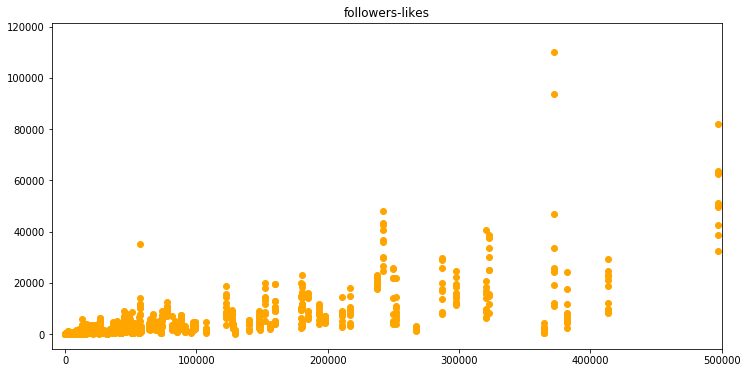

In [209]:
ax = df['followers']
ay = df['likes']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-10000, 500000)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('followers-likes')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

# like/follower : 충성도 지표

In [208]:
df['likes/followers'] = df['likes']/df['followers']
df.drop_duplicates('username').sort_values('likes/followers', ascending=False)[['alias', 'likes/followers', 'followers']][:10]

,alias,likes/followers,followers
8251,Becky&Tommy 베키&타미,0.252794,1879
3740,koi,0.251993,2258
3080,Dragon Stone,0.206768,56943
8113,과학쿠키,0.202509,558
5005,밥지,0.191400,15674
8526,리뷰엉이,0.174515,361
3905,Elise 🐻,0.160419,26356
5665,JM,0.156951,12660
2420,유승엽,0.154293,3273
9351,유소나,0.153481,26303


Slope: nan
Intercept: nan


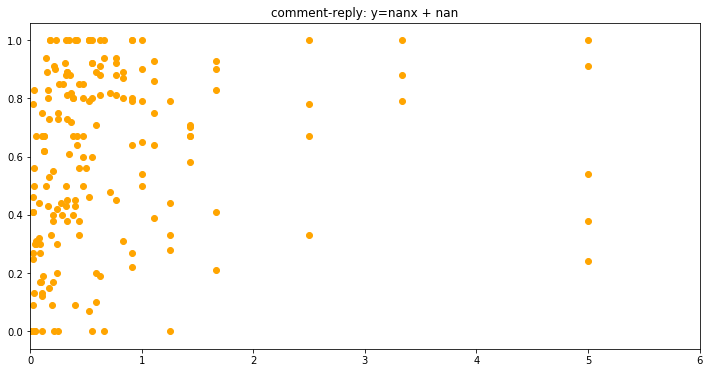

In [33]:
ax = df['post_interval']
ay = df['ppl_img_ratio']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(0, 6)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('comment-reply: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: nan
Intercept: nan


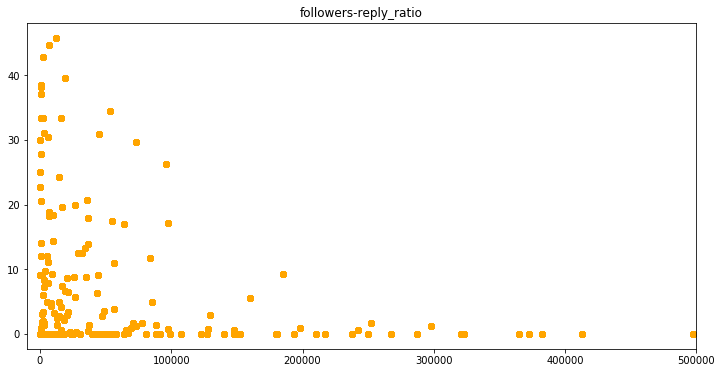

In [198]:
ax = df['followers']
ay = df['reply_ratio']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-10000, 500000)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('followers-reply_ratio')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: nan
Intercept: nan


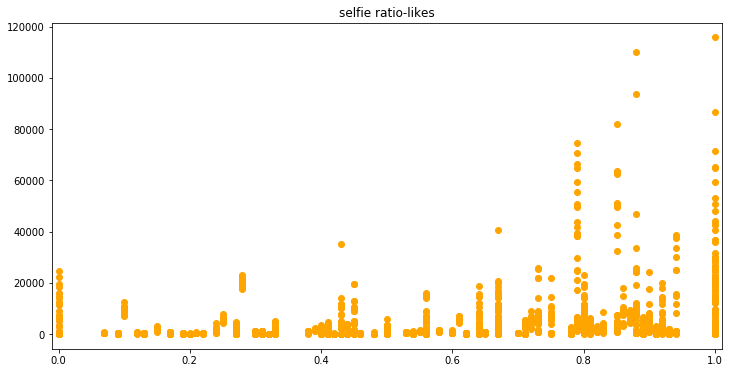

In [243]:
ax = df['ppl_img_ratio']
ay = df['likes']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-0.01,1.01)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,p(ax),"r--")

plt.title('selfie ratio-likes')
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

In [255]:
df.drop_duplicates('username').sort_values(['ppl_img_ratio', 'likes/followers'], ascending=False)[['alias', 'followers', 'likes/followers']][:10]

,alias,followers,likes/followers
3355,Lisa Rhee,242461,0.122733
5280,최마태의 PostIT,18474,0.103822
9186,도영도영이🍦,36704,0.099826
3685,GOD DONGMIN(갓동민),20821,0.097930
8416,데이브 (Dave),287031,0.069233
7068,청춘여락,67111,0.068260
5445,심짱골프,8257,0.057769
5720,tae,22517,0.054581
4565,Raon Lee,413194,0.045584
1650,Ko Hyojoo,565484,0.038102


# 팔로워들의 유형

- 인플루언서 제외 일반인들 (인플루언서의 팔로워 2500명 씩 * 000명)의 팔로워-팔로잉 플롯
- 4유형 정도로 나누고 각 인플루언서당 어느 유형의 팔로워가 몇프로씩 있는지 수치화
- 팔로워, 팔로잉 수 말고 성별 등 추가해서 유형화?

In [1]:
import pandas as pd
df = pd.read_csv('c:/users/home/desktop/BTXGH/instagramEDA/followers_total.csv')

In [4]:
df.head()

,index,alias,bio,bio_url,followers,following,isprivate,num_of_posts,scraped,username,influencer
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./crawled/crawled_the__scoop_0.csv
1,0 1 ... ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./crawled/crawled_the__scoop_0.csv
2,0 1 ... 8...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./crawled/crawled_the__scoop_0.csv
3,0 1 ... ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./crawled/crawled_the__scoop_0.csv
4,0 1 ... 8 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./crawled/crawled_the__scoop_0.csv


In [24]:
df = df.loc[df['alias'].dropna().index]
df = df[(df['alias']!='alias')&(df['influencer']!='profile_influencer.csv')]
df[['followers', 'following']]=df[['followers', 'following']].astype(float)

In [25]:
df.head()

,index,alias,bio,bio_url,followers,following,isprivate,num_of_posts,scraped,username,influencer
20,0.0,Sarah | 25 | aus,NaN,NaN,129.0,76.0,True,826,2019-07-23 00:14:21,sarah_caitlinh,crawled/crawled_gabiekook_0.csv
21,1.0,jane,NaN,NaN,0.0,9.0,True,1,2019-07-23 00:14:23,chae_lee0408,crawled/crawled_gabiekook_0.csv
22,2.0,Lilah Coan,"If you have to cry it doesn't make you weak, i...",NaN,76.0,161.0,False,39,2019-07-23 00:16:24,rileypuplover,crawled/crawled_gabiekook_0.csv
24,4.0,🌎✈️👣,NaN,NaN,104.0,220.0,False,128,2019-07-23 00:17:44,sbbbb14,crawled/crawled_gabiekook_0.csv
25,5.0,Julia Kim 아임,"🇰🇷🇺🇸🇹🇼🇨🇭🇸🇬\r\nfoodie, dancer\r\nhungry 24/7",NaN,1324.0,962.0,False,197,2019-07-23 00:17:46,ah.im,crawled/crawled_gabiekook_0.csv


In [26]:
df.shape[0]

16344

Text(0.5,1,'follower-following')

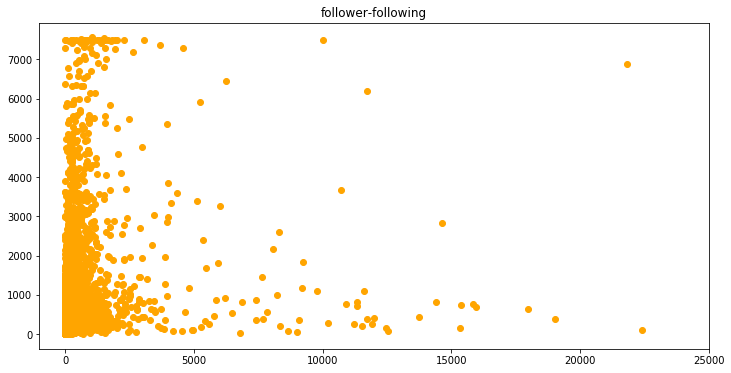

In [29]:
import numpy as np
import matplotlib.pyplot as plt

ax = df['followers']
ay = df['following']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(-100, 25000)
#plt.ylim(-1000, 1000000)

#z = np.polyfit(ax, ay, 1)
#p = np.poly1d(z)
#plt.plot(ax,ax,"r--")

plt.title('follower-following')

# 해시태그 단어

- 크롤링된 caption에는 해시태그가 포함되어 있음, 해시태그에 포함된 이모지는 수집되지 않았음
- caption에서 해시태그 제거, 이모지도 포함한 new hashtag 칼럼 추가
- 인플루언서별 해시태그 top5
- caption의 텍스트 길이, 이모지 포함 비율

In [7]:
import re
import pandas as pd

#df = pd.read_csv('c:/users/home/desktop/BTXGH/instagramEDA/total_data.csv')
df = pd.read_csv('c:/users/home/desktop/total_data.csv')

In [3]:
df.columns

Index(['name', 'youtube', 'avg_hashtag', 'avg_comment', 'avg_self_comment',
       'post_interval', 'ppl_img_ratio', 'comment_user_num', 'lang_ratio',
       'alias', 'username', 'bio', 'num_of_posts', 'followers', 'following',
       'bio_url', 'isprivate', 'scraped', 'caption', 'comments', 'hashtags',
       'likes'],
      dtype='object')

In [4]:
df.head()

,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,alias,...,num_of_posts,followers,following,bio_url,isprivate,scraped,caption,comments,hashtags,likes
0,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,NaN,NaN,NaN,17863
1,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,NaN,NaN,NaN,3007
2,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,💕,"[{'author': 'kariacostav', 'comment': '😍😍'}, {...",NaN,3381
3,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,안경끼니까 뽀로로같네,"[{'author': 'ping_siewsook', 'comment': '😚❤️❤️...",NaN,14918
4,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,847,217262,217,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,내가 가장 좋아하는 바닷가 :속초,"[{'author': 'perrenelle', 'comment': '😍😍😍'}, {...",NaN,9342


In [9]:
df.fillna(0, inplace=True)

In [10]:
captions = df['caption'].tolist()

caption_len = []
new_caption = []
new_hashtags = []

for caption in captions:

    if caption != 0 and '#' in caption:
        p = re.compile(r'#.+?(?=#|\s)')  
        tags = p.findall(caption) # 크롤러로는 해시태그에 포함된 이모티콘이 수집되지 않아 새로운 해시태그 리스트를 만듦
        if tags:
            caption = p.sub('',caption)
        p = re.compile(r'#.+') # 해시태그가 caption 맨 마지막에 있는 경우
        m = p.search(caption)
        if m:
            caption = p.sub('', caption)
            tags.append(m.group())
            
        p = re.compile(r'\s+')
        caption_len.append(len(p.sub('', caption))) # 공백 제거 후 글자만 남김
        new_caption.append(p.sub(' ', caption))
        new_hashtags.append([tag.strip()[1:] for tag in tags]) 
    else:
        caption_len.append(0)
        new_caption.append('')
        new_hashtags.append('')
  
        
captionDf = pd.DataFrame({'new_caption': new_caption, 'caption_len': caption_len, 'new_hashtags': new_hashtags})

In [11]:
newDf = df.join(captionDf)

In [12]:
newDf.head()

,name,youtube,avg_hashtag,avg_comment,avg_self_comment,post_interval,ppl_img_ratio,comment_user_num,lang_ratio,alias,...,bio_url,isprivate,scraped,caption,comments,hashtags,likes,new_caption,caption_len,new_hashtags
0,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,0,0,0,17863,,0,
1,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,0,0,0,3007,,0,
2,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,💕,"[{'author': 'kariacostav', 'comment': '😍😍'}, {...",0,3381,,0,
3,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,안경끼니까 뽀로로같네,"[{'author': 'ping_siewsook', 'comment': '😚❤️❤️...",0,14918,,0,
4,0__0man,0__0man,0.0,40.2,0.0,1.111111,0.86,"{'comment1': 219, 'comment2': 31, 'comment3': ...","{'ko': '55.47', 'emoji': '44.53'}",Kim Nam Woo,...,youtu.be/T8D5TrHkam8,False,2019-07-13 06:06:47,내가 가장 좋아하는 바닷가 :속초,"[{'author': 'perrenelle', 'comment': '😍😍😍'}, {...",0,9342,,0,


In [13]:
# 해시태그 제외 caption text 길이
newDf['avg_text'] = newDf['caption_len'].groupby(newDf['name']).transform('mean')
newDf[['name', 'avg_text']].head()

,name,avg_text
0,0__0man,0.0
1,0__0man,0.0
2,0__0man,0.0
3,0__0man,0.0
4,0__0man,0.0


Slope: 0.032
Intercept: 2.024


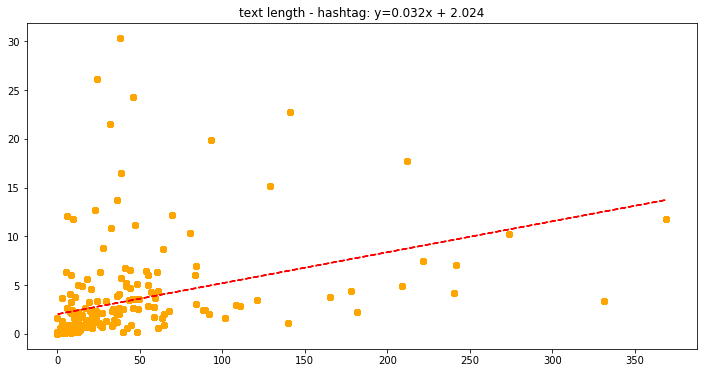

In [14]:
ax = newDf['avg_text']
ay = newDf['avg_hashtag']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('text length - hashtag: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

In [15]:
hashList = []
capList = []
for ele in newDf['new_hashtags'].tolist():
    hashList.extend(ele)
for ele in newDf['new_caption'].tolist():
    capList.append(ele)

In [17]:
from collections import Counter

d = {}
hashtagList = []
for name, group in newDf.groupby('name')['new_hashtags']:
    tagList = []
    for tag in group:
        tagList.extend(tag)
    d = dict(d, **{'name': name, 'taglist': tagList})
    hashtagList.append(d)

top_hashtag = pd.DataFrame()
for influencer in hashtagList:
    common_tags = Counter(influencer.get('taglist')).most_common(5)
    if len(common_tags) > 4:
        top_tags = {'name': influencer.get('name'), 'top1': common_tags[0], 'top2': common_tags[1], 'top3': common_tags[2], 'top4': common_tags[3], 'top5': common_tags[4]}
        top_hashtag = pd.concat([top_hashtag, pd.DataFrame(top_tags)])

In [40]:
top_hashtag.head(10)

,name,top1,top2,top3,top4,top5
0,24x01,디올카페,블랙페키니즈,페키니즈,금요일,반얀트리풀파티
1,24x01,2,1,1,1,1
0,4delight,producerdk,노라조,샤워,wf1000xm3,GH5S
1,4delight,5,1,1,1,1
0,8beube8,장미,꽃,귀여워,하트,하튜
1,8beube8,1,1,1,1,1
0,______toddy,풀무원,생면식감,꼬불꼬불물냉면,꼬불냉면,물냉
1,______toddy,2,2,1,1,1
0,__angoo,bts,btsarmy,angoo,방탄소년단,안구정화tv
1,__angoo,5,3,3,3,2


In [25]:
d = {}
captions = []
re_emoji = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

for name, group in newDf.groupby('name')['new_caption']:
    List = []
    for caption in group:
        List.append(caption)
        string = ' '.join(List)
        emoji = re_emoji.findall(string)
    d = dict(d, **{'name': name, 'caption_emoji': emoji})
    captions.append(d)
    
top_emoji = pd.DataFrame()
for influencer in captions:
    common_tags = Counter(influencer.get('caption_emoji')).most_common(3)
    if len(common_tags) > 2:
        top_tags = {'name': influencer.get('name'), 'top1': common_tags[0], 'top2': common_tags[1], 'top3': common_tags[2], 'num_of_emoji': len(influencer.get('caption_emoji')), 'unique_emoji': len(set(influencer.get('caption_emoji')))}
        top_emoji = pd.concat([top_emoji, pd.DataFrame(top_tags)])

In [26]:
top_emoji.head(10)

,name,top1,top2,top3,num_of_emoji,unique_emoji
0,______toddy,🏼,🏻,🤷,16,8
1,______toddy,5,3,2,16,8
0,__kindacool,💫,🌗,💋,14,11
1,__kindacool,2,2,2,14,11
0,__w_ing__,👍,🏻,👀,3,3
1,__w_ing__,1,1,1,3,3
0,_arikitchen_,💜,🏻,📞,102,27
1,_arikitchen_,31,15,6,102,27
0,b_12.25,💓,🐔,📸,7,3
1,b_12.25,4,2,1,7,3


In [27]:
E = pd.merge(top_emoji.loc[0,:], newDf, on='name')
E.head()

,name,top1,top2,top3,num_of_emoji,unique_emoji,youtube,avg_hashtag,avg_comment,avg_self_comment,...,isprivate,scraped,caption,comments,hashtags,likes,new_caption,caption_len,new_hashtags,avg_text
0,______toddy,🏼,🏻,🤷,16,8,______toddy,3.4,15.8,4.7,...,False,2019-07-13 06:06:45,명암은 언제 넣지 🐍,"[{'author': 'blueskystory', 'comment': '😍👍'}, ...",0,624,,0,,24.2
1,______toddy,🏼,🏻,🤷,16,8,______toddy,3.4,15.8,4.7,...,False,2019-07-13 06:06:45,첫 출근 고생했다 ✌🏼✨,"[{'author': '______toddy', 'comment': '✨'}, {'...",0,977,,0,,24.2
2,______toddy,🏼,🏻,🤷,16,8,______toddy,3.4,15.8,4.7,...,False,2019-07-13 06:06:45,"무더운 여름밤은 물냉이 진리지 ✌🏼\r\n면도 꼬불해서 탱탱하고, 육수가 레알 존맛...","[{'author': 'k.suxx', 'comment': '아 땡깁니다ㅠㅠ'}, ...","['풀무원', '생면식감', '꼬불꼬불물냉면', '꼬불냉면', '물냉', '비냉',...",504,"무더운 여름밤은 물냉이 진리지 ✌🏼 면도 꼬불해서 탱탱하고, 육수가 레알 존맛. 오...",51,"[풀무원, 생면식감, 꼬불꼬불물냉면, 꼬불냉면, 물냉, 비냉, 물냉면, 비빔냉면]",24.2
3,______toddy,🏼,🏻,🤷,16,8,______toddy,3.4,15.8,4.7,...,False,2019-07-13 06:06:45,"오늘도 배터지게 먹었다 ✌🏼\r\n파스타,피자,생맥주의 환상조합은 역시 피자무쪼 🍺...","[{'author': '______toddy', 'comment': '🍺', 'he...","['피자무쪼', '호가든플래그십스토어', '이태원피자', '이태원맛집']",1201,"오늘도 배터지게 먹었다 ✌🏼 파스타,피자,생맥주의 환상조합은 역시 피자무쪼 🍺 호가...",57,"[피자무쪼, 호가든플래그십스토어, 이태원피자, 이태원맛집]",24.2
4,______toddy,🏼,🏻,🤷,16,8,______toddy,3.4,15.8,4.7,...,False,2019-07-13 06:06:45,이집 밀크티 잘하네 👀,"[{'author': 'iamjinkyu_', 'comment': '맛있겠어요👍🏻'...",0,409,,0,,24.2


In [28]:
E['emoji_ratio'] = E['num_of_emoji']/(E['avg_text']*10)

Slope: -11.588
Intercept: 9.605


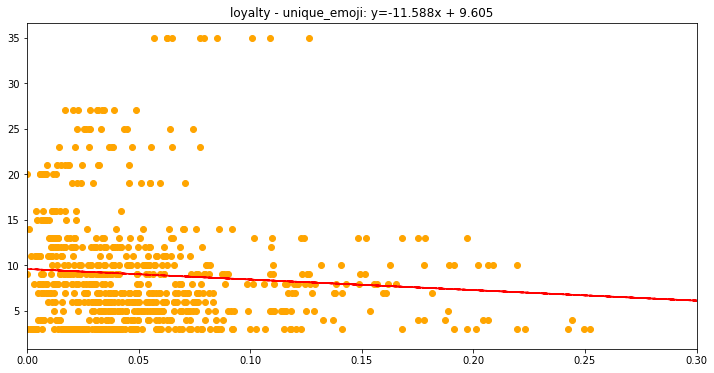

In [31]:
ax = E['likes']/E['followers']
ay = E['unique_emoji']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

plt.xlim(0, 0.3)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('loyalty - unique_emoji: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))

Slope: -0.000
Intercept: 0.766


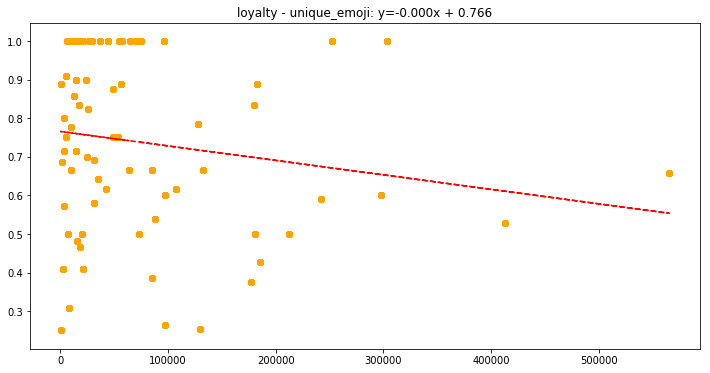

In [32]:
ax = E['followers']
ay = E['unique_emoji']/E['num_of_emoji']

plt.figure(figsize=(12,6))
plt.scatter(ax, ay, color='orange')

#plt.xlim(0, 0.3)

z = np.polyfit(ax, ay, 1)
p = np.poly1d(z)
plt.plot(ax,p(ax),"r--")

plt.title('loyalty - unique_emoji: y={0:.3f}x + {1:.3f}'.format(z[0], z[1]))
print('Slope: {0:.3f}'.format(z[0]))
print('Intercept: {0:.3f}'.format(z[1]))